# Predicting Breast Cancer - Exercise

This example uses the Breast Cancer Wisconsin (Diagnostic) Database to create a classifier that can help diagnose patients. The goal is to classify whether a breast cancer is benign or malignant. We will use random forest and decision tree as well and compare the accuracy of both.

## 1. Import libraries and read the data

To begin, we import the following libraries.

In [5]:
import numpy
import pandas

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

Next load the Wisconsin dataset with load_breast_cancer().

In [6]:
# load dataset

bc = load_breast_cancer()
bc

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

## 2. Explore the data

Print the target and feature names, to make sure you have the right dataset.

In [7]:
# print the target nams
print("target: ")
print(bc.target_names)

# print the features
print("feature:")
print(bc.feature_names)

target: 
['malignant' 'benign']
feature:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


It's a good idea to always explore your data a bit, so you know what you're working with. Print the first five rows of the dataset, as well as the target variable for the whole dataset.

In [8]:
# print the top 5 records
print(bc.data[0:5])

# print the target variable
print(bc.target)

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

We can create a DataFrame of the dataset the following way.

In [9]:
# create a pandas DataFrame of given breast cancer dataset

data = numpy.c_[bc.data, bc.target]
columns = numpy.append(bc.feature_names, ["target"])
bc_df = pandas.DataFrame(data, columns=columns)

Print the first 5 rows of the dataset.

In [10]:
# the first 5 rows in the dataset
print(bc_df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

## 3. Data splicing

Our next step is to divide the data into independent variables (features) and dependent variables (labels) whose values are to be predicted. Next, split 70% of the data to the training set, while 30% of the data to the test set.

In [11]:
# split the data
X = bc_df.drop(["target"], axis=1)
y = bc_df["target"]


# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

Check the content of X and y.

In [12]:
# print X
print(X_train.shape)

(398, 30)


In [13]:
# print y
print(y_train.shape)


(398,)


## 4. Train the models

After splitting, train the models with the training set. Use 1 DecisionTree model and 1 RandomForest model. Use 100 trees in the random forest. We will compare the aceurracy of both models later.

Hint: make it a habit of looking at the documentation of the functions you're using. So, for RandomForests in de scikit-learn library, check out: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


In [14]:
## build the models
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Decision Tree")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## train the classifiers
# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Random Forest")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Decision Tree
[[ 51  12]
 [  4 104]]
              precision    recall  f1-score   support

         0.0       0.93      0.81      0.86        63
         1.0       0.90      0.96      0.93       108

    accuracy                           0.91       171
   macro avg       0.91      0.89      0.90       171
weighted avg       0.91      0.91      0.90       171



Random Forest
[[ 58   5]
 [  3 105]]
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.94        63
         1.0       0.95      0.97      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



## 5. Predictions

Now that we have trained our model, it’s time to make some predictions. To do so, use the test data.

In [15]:
# create predictions
predictions = rf.predict(X_test)
print(predictions[0:5])

[0. 0. 1. 0. 0.]


After training, check the accuracy of both models using actual and predicted values.

In [16]:
# check the performance of each model
print("Decision Tree")
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

print("Random Forest")
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


Decision Tree
[[ 58   5]
 [  3 105]]
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.94        63
         1.0       0.95      0.97      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

Random Forest
[[ 58   5]
 [  3 105]]
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.94        63
         1.0       0.95      0.97      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



Does the random forest really outperforms the decision tree? Generate the confusion matrix for both models to see what the performance increase actually looks like.

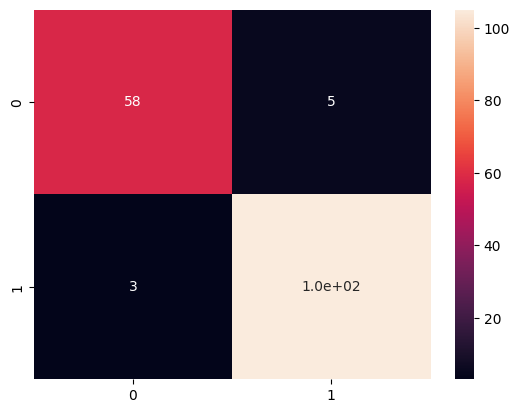

In [17]:
# graph the confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True)
plt.show()

As you can see (in my case, you might get different results), we’re able to 

- increase the number of correctly predicted malignant (from 63 to 65) and benign (from 94 to 96) tumors
- decrease the number of benign tumors that are predicted as malignant (from 4 to 2)
- decrease the number of malignant tumors that are predicted as benign (from 10 to 8)

By using a random forest, we can more accurately predict the state of a tumor, potentially decreasing the amount of unneeded procedures performed on patients and decreasing patient stress about their diagnosis.